<p align="center">
    <img src="./images/msp_header.png">
</p>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta



In [1]:
# Environments Confguration

# Google Colab
inColab=False

try:
    import google.colab
    from google.colab import widgets
    inColab=True
    
    # Upgrade Matplotlib
    !pip install matplotlib --upgrade
    
except Exception as e:
    if inColab:
        print("Error in Congiguration.%s" % e)
        stop
    
    print("Not inside Google Colab: %s. Using standard configurations." % (e))

Not inside Google Colab: No module named 'google'. Using standard configurations.


# Introduction

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/rkQN6WVi8ak" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## What is Multirate Signal Processing?

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/wgIdNoxhEMY" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture"></iframe>

**Multirate:** meaning different sampling
rates, as from using downsampling or
upsampling. In filter banks (or convolutional
Neural Networks, e.g. for pattern
recognition), we reduce the sampling rate
after filtering a signal, which reduces the
bandwidth. For reconstruction and obtaining
the original sampling rate, we need to upsample and filter (for interpolation) the
signal.

## Where is Multirate Signal Processing used?

For instance in coding and compression algorithms, like the:
- Modified Discrete Cosine Transform (MDCT) filter bank in audio coding 
- Discrete Cosine Transform (DCT) in image or video coding
- Channel coding (OFDM:Orthogonal frequency-division multiplexing), where a channel is divided into many narrower channels with lower data rates and hence longer symbol duration, to reduce problems with multipath/reflections
- Machine Learning and Deep Neural Networks


## Example of a Discrete Time Signal:

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/J5dJMhYMNXo" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<IPython.core.display.Javascript object>


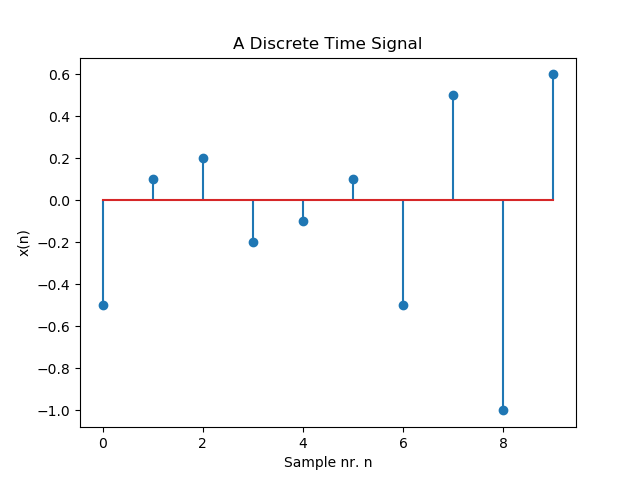

In [2]:
import numpy as np
if not inColab:
    %matplotlib notebook
import matplotlib.pyplot as plt
np.random.seed(1)
plt.figure()
plt.stem(np.random.randint(-10,10,size=10)/10, use_line_collection=True)
plt.title('A Discrete Time Signal')
plt.ylabel('x(n)')
plt.xlabel('Sample nr. n');

Typical sampling rate of audio from a CD:
44100 samples/second, or
44.1 Khz sampling rate.

**If you are not familiar with Python, I recommend you to check out some online tutorials**: https://github.com/GuitarsAI

## Python example for a live plot of a microphone signal:
**This Example won't work in Binder and Google Colab!**

In [5]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ic51XKmwXEc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
"""
Using Pyaudio, record sound from the audio device and plot, for 8 seconds, and display it live in a Window.
Usage example: python pyrecplotanimation.py
Gerald Schuller, October 2014 

Adapted to Jupyter Notebook - Renato Profeta, August 2019
"""
# Imports
import pyaudio
import struct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
CHUNK = 1024 #Blocksize
WIDTH = 2 #2 bytes per sample
CHANNELS = 1 #2
RATE = 32000  #Sampling Rate in Hz
RECORD_SECONDS = 70

# PyAudio
p = pyaudio.PyAudio()
stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK)

# Plot
fig, ax = plt.subplots()
x = np.arange(0, CHUNK)        # x-array
line, = ax.plot(x, 20000.0*np.sin(x))   #Scale axis as this sine function

def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

def animate(i):
    # update the data
    #Reading from audio input stream into data with block length "CHUNK":
    data = stream.read(CHUNK)
    #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
    #shorts = (struct.unpack( "128h", data ))
    shorts = (struct.unpack( 'h' * CHUNK, data ));
    samples=np.array(list(shorts),dtype=float);

    #plt.plot(samples)  #<-- here goes the signal processing.
    #line.set_ydata(np.log((np.abs(pylab.fft(samples))+0.1))/np.log(10.0))
    line.set_ydata(samples)
    return line,

def handle_close(evt):
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()
    plt.close()
plt.connect('close_event', handle_close)

# Run animation
ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
    interval=25, blit=True)
plt.show()

## Javascript example for a live plot of a microphone signal:
Adapted from https://mdn.github.io/voice-change-o-matic/


**Ths example won't work in Google Colab!**

In [6]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/MUQediph-Ms" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
%%html
<head>
<style>
.wrapper {
	height: 100%;
	max-width: 800px;
	margin: 0 auto;
}
header {
  height: 120px;
}

canvas {
  border-top: 1px solid black;
  border-bottom: 1px solid black;
  margin-bottom: -3px;
  box-shadow: 0 -2px 4px rgba(0,0,0,0.7),
              0 3px 4px rgba(0,0,0,0.7);
}

.controls {
  background-color: rgba(0,0,0,0.1);
  height: calc(100% - 225px);
}


form a {    
    background-color: #0088cc;
    background-image: linear-gradient(to bottom,  #0088cc 0%,#0055cc 100%); 
    text-shadow: 1px 1px 1px black;  
    text-align: center;
    color: white;
    border: none;
    width: 90\%;
    margin: 1rem auto 0.5rem;
    max-width: 80\%;
    font-size: 1.6rem; 
    line-height: 3rem;
    padding: .5rem; 
    display: block;
                    }

form a:hover, form a:focus {
	box-shadow: inset 1px 1px 2px rgba(0,0,0,0.7);
}

form a:active {
	box-shadow: inset 2px 2px 3px rgba(0,0,0,0.7);
}

a#activated {
  background-color: #fff;
  background-image: linear-gradient(to bottom,  #f00 0%, #a06 100%);
}



a {
  color: #aaa;
}

a:hover, a:focus {
  text-decoration: none;
}


 </style>
</head>

<div class="wrapper">
    
    <header>
      <h1>Audio Waveform</h1>
    </header>

    <canvas class="visualizer" width="640" height="100"></canvas> 
<br>
    <form class="controls">
        <div>
            <a class="mute">Mute</a>
        </div>
    </form>
<br>
<br>
</div>

In [ ]:
%%javascript

// Audio
var audioCtx = new (window.AudioContext || window.webkitAudioContext)();
var source;
var stream;

// Button
var mute = document.querySelector('.mute');

// Audio Nodes
var analyser = audioCtx.createAnalyser();
analyser.minDecibels = -90;
analyser.maxDecibels = -10;
analyser.smoothingTimeConstant = 0.85;

var gainNode = audioCtx.createGain();

// Canvas
var canvas = document.querySelector('.visualizer');
var canvasCtx = canvas.getContext("2d");
var intendedWidth = document.querySelector('.wrapper').clientWidth;
canvas.setAttribute('width',intendedWidth);
var drawAudio;

// Audio Recording
if (navigator.mediaDevices.getUserMedia) {
     console.log('getUserMedia supported.');
     var constraints = {audio: true}
     navigator.mediaDevices.getUserMedia (constraints)
        .then(
          function(stream) {
             source = audioCtx.createMediaStreamSource(stream);
             source.connect(gainNode);
             gainNode.connect(analyser);
             //analyser.connect(audioCtx.destination);
             visualize();
        })
        .catch( function(err) { console.log('The following gUM error occured: ' + err);})
  } else {
     console.log('getUserMedia not supported on your browser!');
  }
  

mute.onclick = voiceMute;

function voiceMute() {
    if(mute.id === "") {
      gainNode.gain.setTargetAtTime(0, audioCtx.currentTime, 0)
      mute.id = "activated";
      mute.innerHTML = "Unmute";
    } else {
      gainNode.gain.setTargetAtTime(1, audioCtx.currentTime, 0)
      mute.id = "";
      mute.innerHTML = "Mute";
    }
  }  

function visualize() {
    var WIDTH = canvas.width;
    var HEIGHT = canvas.height;


    var visualSetting ="waveform";
    console.log(visualSetting);

    if(visualSetting === "waveform") {
      analyser.fftSize = 2048;
      var bufferLength = analyser.fftSize;
      console.log(bufferLength);
      var dataArray = new Uint8Array(bufferLength);

      canvasCtx.clearRect(0, 0, WIDTH, HEIGHT);

      var draw = function() {

        drawAudio = requestAnimationFrame(draw);
          
        analyser.getByteTimeDomainData(dataArray);

        canvasCtx.fillStyle = 'rgb(200, 200, 200)';
        canvasCtx.fillRect(0, 0, WIDTH, HEIGHT);

        canvasCtx.lineWidth = 2;
        canvasCtx.strokeStyle = 'rgb(0, 0, 0)';

        canvasCtx.beginPath();

        var sliceWidth = WIDTH * 1.0 / bufferLength;
        var x = 0;

        for(var i = 0; i < bufferLength; i++) {

          var v = dataArray[i] / 128.0;
          var y = v * HEIGHT/2;

          if(i === 0) {
            canvasCtx.moveTo(x, y);
          } else {
            canvasCtx.lineTo(x, y);
          }

          x += sliceWidth;
        }

        canvasCtx.lineTo(canvas.width, canvas.height/2);
        canvasCtx.stroke();
      };

      draw();


    } else if(visualSetting == "off") {
      canvasCtx.clearRect(0, 0, WIDTH, HEIGHT);
      canvasCtx.fillStyle = "red";
      canvasCtx.fillRect(0, 0, WIDTH, HEIGHT);
    }

  }

## Nyquist Theorem

In [7]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/lMrsXilWzHs" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

- The Nyquist theorem tells us: Our signal needs to be **band limited** to **less than half the sampling frequency**. If we have 44.1 kHz sampling, this is less than 22.05 kHz. **Half the sampling frequency** is also called the **Nyquist frequency**.

- For time discrete signals we only use **normalized frequencies**, normalized to the **sampling frequency** or the **Nyquist frequency**. For the latter, the normalized frequency of 1 would be the Nyquist frequency. Often you also find $\pi$ as the Nyquist Frequency.

## Simple Sample Rate Conversion Example: 

In [8]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/b6GsF3mOfIA" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

- Sampling rate conversion of an audio signal from 44.1 kHz (from a CD) down to 32 kHz on the computer. The signal at 44.1 kHz sampling rate has all frequencies strictly below 22.05 kHz (because of the Nyquist Theorem). A signal at 32 Khz sampling rate needs all frequencies strictly below 16 kHz.
- **Observe:** here we lose the highest frequency components (16kHz-22 kHz, which is basically okay since human hearing is usually only up to about 16 kHz). **Before down-sampling we have to remove these high-frequency components by low pass filtering.**

## Basic Building Blocks of Multirate Signal Processing:
### Up-Sampling and Down-Sampling

In [9]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/ZlVj4g695Ks" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

- Upsampling: The other way around, from 32 kHz to 44.1 kHz sampling rate.
- **Observe:** here we obtain a new frequency range from 16kHz to 22 kHz, which should contain no signal components. **Here we have to low pass the up-sampled signal to these 16 kHz.**

- The following picture shows the basic building blocks for low-pass filtering and down-sampling by a factor of N, and upsampling by a factor of N followed by lowpass filtering:
<p align="center">
    <img src="./images/upDownSamplingBlocks.png">
</p>


**Observe:** We can do this downsampling and upsampling without loss of information (meaning the reconstructed signal is identical to the lowpass signal), if we obey the **Shannon-Nyquist** law.
This means the low pass (LP) needs to be an ideal low pass with  (normalized to the Nyquist frequency at the higher sampling rate)  cutoff frequency $^1$/$_N$.
In this way we can perfectly reconstruct the lowest $^1$/$_N$ th of our signals spectrum.


In [10]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/L-2XaxQVoGo" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Example:** We have an audio signal with a sampling rate of 32 kHz and hence an audio bandwidth of less than 16 kHz. For N=2 we low pass filter it to 8 kHz, to remove the frequencies at and above the new Nyquist frequency of 8 kHz. Then we can
downsample it by a factor of N=2 (by dropping every second sample), to obtain an audio signal at a sampling rate of 16 kHz. 

We can the upsample the audio signal back to 32 kHz, by a factor of 2, by insterting a 0 after each sample, which produces “alias” components above 8 kHz, and then low pass filter the signal, again with our lowpass with cutoff frequency of 8 kHz, to remove the alias components. This results in the same audio signal with bandwidth of 8 kHz, but now at 32 kHz sampling rate.

## Critical Sampling

In [11]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/lCuzFzPNZps" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The following picture shows a **filter bank** with **critical sampling**, which means its downsampling rate N is identical to the number of subbands. 

### Analysis Filter Bank
It is the principal tool for multirate signal processing, first the analysis filter bank:

In [12]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/zP9Y5I80_F4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<p align="center">
    <img src="./images/analysisFB.png">
</p>

**Observe:** For each time step ***m*** we obtain a spectrum, and for each subband we obtain a narrow bandwidth time signal. So depending on our perspective, we have a set of spectra, or a set of narrow bandwidth time signal.
### This is why we also call this a *time/frequency* representation. 

**Remember:** The **filter** boxes symbolize a **convolution** of the signal x (n) with the impulse response h(n) of length L of each filter, before downsampling:

\begin{equation}\label{eq:1}
\Large
x\left(n \right) * h\left(n \right) =  \sum_{l=0}^{L-1}x\left(n-l\right) \cdot h\left(l\right)
\end{equation}

where the sum is assumed to go over only the parts where x (n) and h(n) are defined. 


In [13]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/eWJtZHHK_k0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

*Convolution Revision and Implementation of the Convolution 1D and 2D Algorithms in 4 different programming languages: Python, Javascript, Java and C++*- https://github.com/GuitarsAI/AlgorithmsRepo

Downsampling by N means we replace n by $mN+n_0$ , with m the index m at the lower sampling rate, and $n_0$ the phase
index,

\begin{equation}\label{eq:2}
\Large
y_{n_0}^{\downarrow N}\left(m \right) =  \sum_{l=0}^{L-1}x\left(mN+n_0-l\right) \cdot h_k\left(l\right)
\end{equation}

The analysis filter bank decomposes the signal into different frequency bands.

**Observe:** Each frequency band has a lower sampling rate, which is possible because they have a lower bandwidth. <br>Using the “bandpass Nyquist” theorem we can reconstruct the original signal from the subbands!


### Synthesis Filter Bank
To reconstruct the original from the different frequency bands, we need the **synthesis filter bank**:
<p align="center">
    <img src="./images/synthesisFB.png">
</p>
To simplify notation we dropped the downarrow and phase index for the subband signals $y_k(m)$.

In [14]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/-wh47bWVWGw" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Observe:** The filters after the upsampling take on the role of the lowpass filter in the conventional Nyquist theorem, to block the alias components. <br> They “fish out” the correct frequency image out of the aliased images for that subband. All the subbands are then added up to reconstruct the original signal.



**Example**: For our 2-band system: We have N=2, original sampling rate 32 kHz. Then the low pass branch corresponds to our low pass example above, which reconstructs the signal from 0 to 8 kHz. We now also have a high pass branch, which in addition reconstructs the frequency from 8kHz to 16 kHz. We add the two subbands in the synthesis filter bank to obtain the full bandwidth signal from 0 to 16 kHz.